In [3]:
import numpy as np


import pandas as pd
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics as sgr
from statsmodels.formula.api import logit
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import tweepy

from twitter_config import config



df=pd.read_csv('desktop/retweets.csv')
dfnew=df.loc[(df['lang']=='en')]
auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)


dfnew.head(5)





,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,retweetMepId,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang
3,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en
5,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,124965,Nathan GILL,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en
11,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,96672,Marita ULVSKOG,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en
12,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en
13,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en


In [35]:
#it takes a lot of time to download all the tweets

exc=0
list_of_ids=[]
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in dfnew.origTweetId:   
    try:
        tweet = api.get_status(each_id)
        list_of_tweets.append(tweet.text)
        list_of_ids.append(each_id)
    except Exception as e:
        exc=exc+1
print(len(list_of_tweets))
print(exc)
            
        

KeyboardInterrupt: 

In [31]:
percentile_list1 = pd.DataFrame(
    {'ids': list_of_ids})
percentile_list1=percentile_list1

percentile_list1.to_pickle('Desktop/dummy1.pkl') #saving the ids dataframe to a file

            

NameError: name 'list_of_ids' is not defined

In [5]:
percentile_list = pd.DataFrame(
    {'texts': list_of_tweets})
percentile_list=percentile_list

percentile_list.to_pickle('Desktop/dummy.pkl')#saving the texts dataframe to a file


percentile_list

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,retweet_count,retweeted,source,text,truncated,user
0,NaN,NaN,2009-07-04 18:40:34,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,2472445567,2472445567,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Votto leads off the 5th w/ his 10th homerun of...,False,"{'id': 23011995, 'id_str': '23011995', 'name':..."
1,NaN,NaN,2009-06-14 14:37:22,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,2165445573,2165445573,jamierumbelow,2.165420e+09,2.165420e+09,14316803.0,14316803.0,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","@jamierumbelow or derived tables, but yes.",False,"{'id': 19750873, 'id_str': '19750873', 'name':..."
2,NaN,NaN,2008-06-04 11:17:18,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,826743260,826743260,None,NaN,NaN,NaN,NaN,False,ja,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",iphone、ソフトバンクじゃん！知らなかったぁ,False,"{'id': 9117962, 'id_str': '9117962', 'name': '..."
3,NaN,NaN,2008-07-11 20:41:57,"{'hashtags': [], 'symbols': [], 'user_mentions...",4,False,NaN,856010760,856010760,NobleRot,8.560068e+08,8.560068e+08,6167072.0,6167072.0,False,en,NaN,2,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@NobleRot I think there's a company in Olathe ...,False,"{'id': 12285702, 'id_str': '12285702', 'name':..."
4,NaN,NaN,2009-02-27 02:03:56,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,1256386124,1256386124,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",**MAYA ANGELO** has been deleted. Page is list...,False,"{'id': 19996729, 'id_str': '19996729', 'name':..."
5,NaN,NaN,2009-06-26 23:36:29,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,2351820624,2351820624,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Eat Sleep Draw!: www.ashleystuartgoodwin.com\n...,False,"{'id': 17403059, 'id_str': '17403059', 'name':..."
6,NaN,NaN,2007-05-08 12:03:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,55031092,55031092,None,NaN,NaN,NaN,NaN,False,ja,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ふぇー。疲れたー。会社出ます。,False,"{'id': 4827361, 'id_str': '4827361', 'name': '..."
7,NaN,NaN,2007-07-11 06:17:16,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,144238332,144238332,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tea and then bed,False,"{'id': 7277932, 'id_str': '7277932', 'name': '..."
8,NaN,NaN,2009-06-22 14:57:04,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,2279751087,2279751087,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",10:56AM - The New Song We Sing by: Meredith An...,False,"{'id': 39762094, 'id_str': '39762094', 'name':..."
9,NaN,NaN,2008-06-16 02:51:26,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,NaN,835659450,835659450,None,NaN,NaN,NaN,NaN,False,en,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reading 'Public Enemies' and doing laundry. Su...,False,"{'id': 14572636, 'id_str': '14572636', 'name':..."


In [5]:
result = pd.concat([percentile_list, percentile_list1], axis=1)
result = result.drop_duplicates(subset='ids', keep="first") #dropping the same texts


result

,texts,ids
0,Euro Parliament votes overwhelmingly to reject...,220473289259233285
1,"US have one currency, one Central Bank and one...",353060776707235841
2,More jobs for young people is my top priority ...,467647542378123264
3,"Vote #Labour, get Tory. Vote Tory, get Labour....",471694322472353793
5,Answering my question in ECR Group J-C Juncker...,486509184708792320
6,Robert Halfon raising issue of illegal travell...,500600838419935232
7,"Ignore the Labour lies, this is where #UKIP st...",512257283087429632
8,Next week I'll be grilling EU Commissioner can...,515077347645870080
9,#Migration can be positive for the UK - only i...,516923314225553409
10,"""Vote UKIP, get Labour"" says Dave. Really...? ...",517285141371453440


In [6]:
newresult = pd.merge(dfnew, result, left_on = 'origTweetId', right_on = 'ids') 


df1 = newresult[['origUserId','origMepGroupShort']]
df1 = df1.groupby('origMepGroupShort').count().reset_index()
finaldf = pd.merge(newresult, df1, on ='origMepGroupShort')
finaldf = finaldf.loc[finaldf['origUserId_y'] >50]

finaldf['texts']=finaldf['texts'].str.replace('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+',' ') #removing urls from texts using regex
finaldf.head(5)

,origUserId_x,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,retweetMepId,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,texts,ids,origUserId_y
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...,220473289259233285,3261
1,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,124945,Margot PARKER,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour....",471694322472353793,3261
2,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"Vote #Labour, get Tory. Vote Tory, get Labour....",471694322472353793,3261
3,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,4516,Roger HELMER,6,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en,Robert Halfon raising issue of illegal travell...,500600838419935232,3261
4,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,124971,James CARVER,6,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en,"Ignore the Labour lies, this is where #UKIP st...",512257283087429632,3261


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents='unicode',min_df=10, max_df=0.50,stop_words='english')
vectorizer.fit(finaldf.texts)
X = vectorizer.fit_transform(finaldf.texts)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

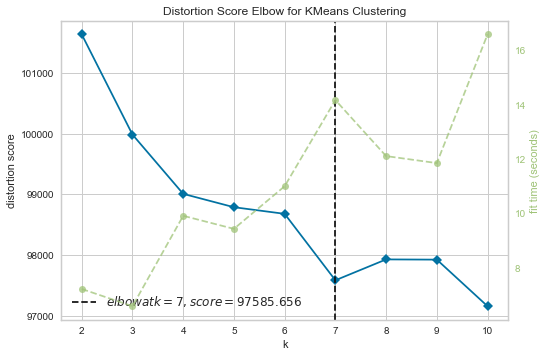

In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans)

visualizer.fit(X)
visualizer.show()

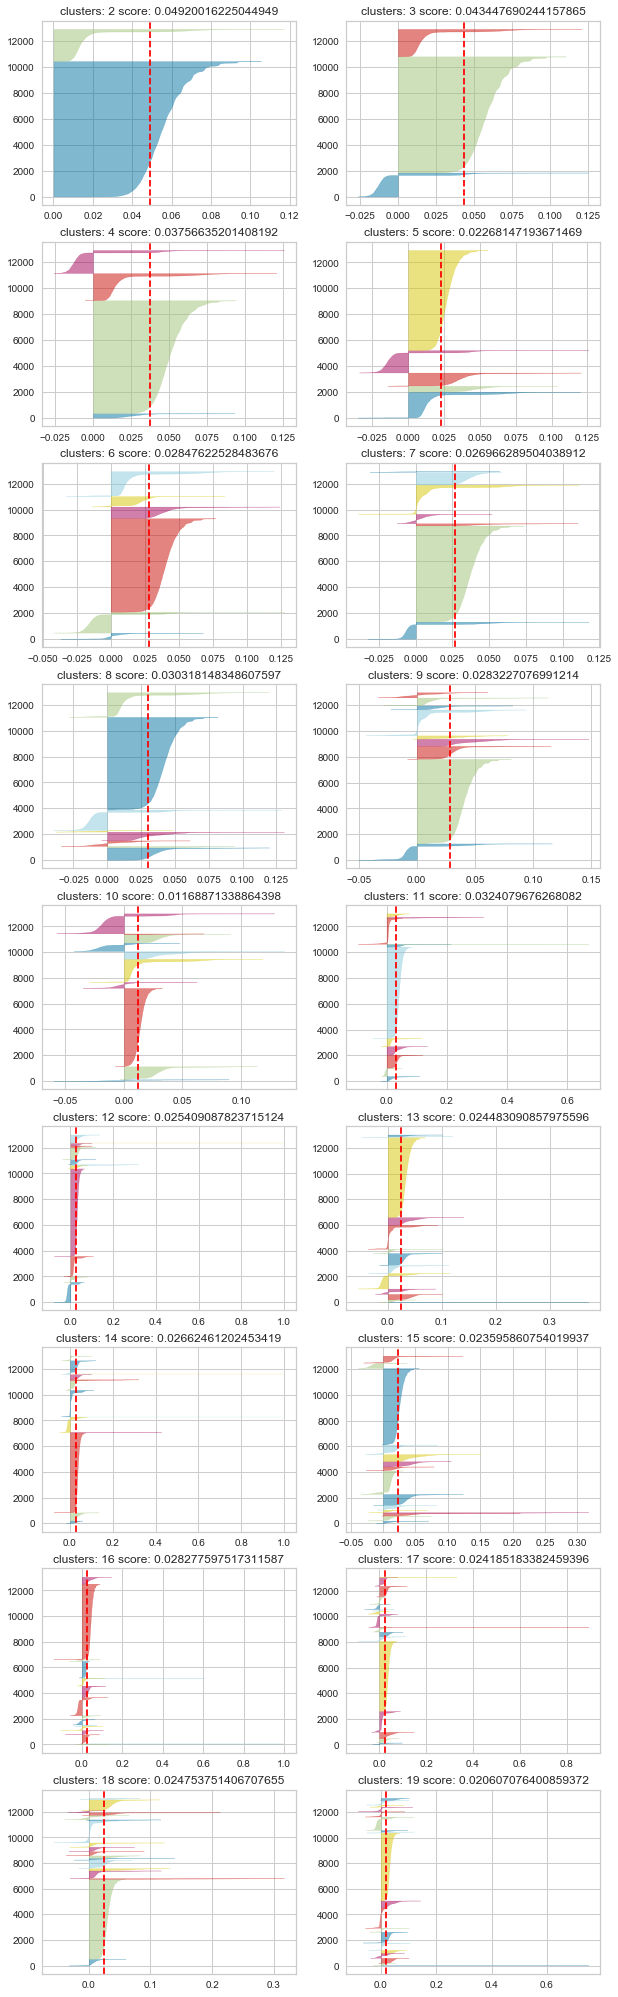

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [10]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)


[(2, 0.04920016225044949),
 (3, 0.043447690244157865),
 (4, 0.03756635201408192),
 (11, 0.0324079676268082),
 (8, 0.030318148348607597),
 (6, 0.02847622528483676),
 (9, 0.0283227076991214),
 (16, 0.028277597517311587),
 (7, 0.026966289504038912),
 (14, 0.02662461202453419),
 (12, 0.025409087823715124),
 (18, 0.024753751406707655),
 (13, 0.024483090857975596),
 (17, 0.024185183382459396),
 (15, 0.023595860754019937),
 (5, 0.02268147193671469),
 (19, 0.020607076400859372),
 (10, 0.01168871338864398)]

In [11]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

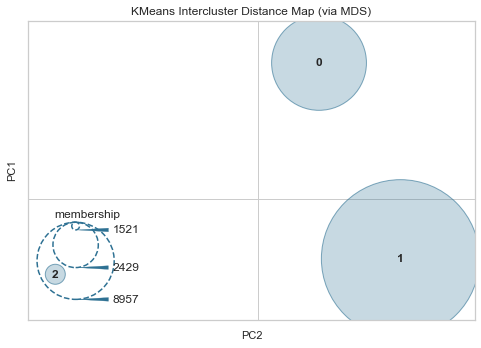

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance



# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

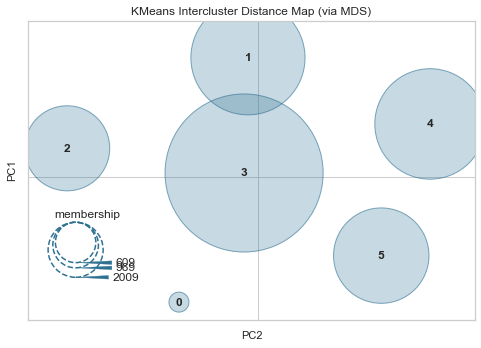

In [14]:
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



In [18]:
import numpy 
words=20
numpy.set_printoptions(threshold=1000)
clustercenters=kmeans.cluster_centers_.argsort()[:,::-1]
tf_feature_names=vectorizer.get_feature_names()
for i in range(0,7):
    print('Cluster %d:'%i)
    print()
    for y in clustercenters[i,:words]:
        print('%s'%tf_feature_names[y])
    print()
    
#the 0 cluster talks about workers union and migration
#the 1 cluster talks about european parliament
#the 2 cluster talks about the progressives
#the 3 cluster talks about labour rights
#the 4 cluster talks about uk labour party
#the 5 cluster talks about Cameron
#the 6 cluster talks about europe

Cluster 0:

europe
amp
eppgroup
eu
people
need
change
greece
refugees
migration
work
needs
says
future
european
new
want
good
union
juncker

Cluster 1:

today
eu
ukip
great
vote
meps
eppgroup
day
people
european
meeting
debate
parliament
support
ep
ttip
europarl_en
join
campaign
party

Cluster 2:

great
amp
thanks
eu
eurolabour
news
speech
support
theprogressives
european
hear
ep
meeting
eppgroup
work
labour
campaign
day
meet
team

Cluster 3:

amp
eu
eppgroup
good
meps
today
european
meeting
ttip
uk
ep
vote
need
debate
people
theprogressives
support
greece
labour
rights

Cluster 4:

ukip
vote
labour
party
nhs
uk
people
amp
poll
just
immigration
election
policy
lab
voters
meps
national
farage
tories
mep

Cluster 5:

eu
uk
leave
referendum
cameron
meps
people
britain
support
need
just
european
membership
labour
vote
want
migration
turkey
trade
policy

Cluster 6:

european
eppgroup
ep
ttip
people
vote
parliament
good
meeting
new
just
europarl_en
meps
debate
support
greece
labour
need
thep

In [4]:
#reading the files that i saved, so i dont have to wait every time
percentile_list=pd.read_pickle('Desktop/dummy.pkl')
percentile_list1=pd.read_pickle('Desktop/dummy1.pkl')


In [19]:

X = finaldf.texts
y = finaldf.origMepGroupShort
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer 

print(X_train)

1145     UKIP membership has just gone over 44,000. Tod...
3207     'Renegotiation' a con job. EU fanatics hungrie...
8462     365 days have gone by &amp; Nadia Savchenko is...
4982     TTIP debate now underway in the EU parliament,...
10020    End of a successful @EPPGroup Bureau meeting i...
8940     #MH17 tragedy in 2014, might become a tragedy ...
852      Britain deserves better. Vote @UKIP.  /KUUF9yrxVR
1494     Lovely moment today in dudley when a couple ca...
9709     “European defense spending by country and subr...
6412     Huge congratulations to my good friend &amp; c...
2464     Heads Up: I'm on @BBC5Live @JPonpolitics at 10...
3635     Thanks to @BBCSurrey for having me on earlier ...
11236    .@EPPGroup calls for the immediate release of ...
1805     #UKIP believes firmly in the #NHS Not the Inte...
2288     Just 1 in 20 cars in Calais being checked for ...
7585     Is not a womens' issue. Men need to speak up t...
7080     @anthea_mcintyre @ddalton40 addressing the Eur.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf1 = Pipeline([('vect', CountVectorizer(strip_accents='unicode',min_df=10, max_df=0.50,stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf1.fit(X_train, y_train)
predicted = text_clf1.predict(X_test)
np.mean(predicted == y_test) 
from sklearn import metrics

print(metrics.classification_report(y_test, predicted,
                                    target_names=finaldf.origMepGroupShort.drop_duplicates()))
print()
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

        EFDD       0.64      0.51      0.57       367
         S&D       0.90      0.20      0.33       221
         ECR       0.65      0.91      0.76       669
        ALDE       0.64      0.70      0.67       409
         EPP       0.93      0.19      0.31        70
  Greens-EFA       0.74      0.36      0.48       219
     GUE-NGL       0.61      0.73      0.66       627

    accuracy                           0.65      2582
   macro avg       0.73      0.51      0.54      2582
weighted avg       0.67      0.65      0.62      2582


[[186   1  54  48   1  11  66]
 [ 10  44  90  27   0   2  48]
 [  9   0 607   8   0   0  45]
 [ 33   1  27 286   0   5  57]
 [  5   0  18   2  13   2  30]
 [ 25   2  39  30   0  79  44]
 [ 22   1  96  45   0   8 455]]


In [45]:
from sklearn.linear_model import SGDClassifier
text_clf2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3,
                                           random_state=42))
                    ])
text_clf2.fit(X_train, y_train)
predicted = text_clf2.predict(X_test)
np.mean(predicted == y_test)    
from sklearn import metrics

print(metrics.classification_report(y_test, predicted,
                                    target_names=finaldf.origMepGroupShort.drop_duplicates()))
print()
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

        EFDD       0.84      0.58      0.68       367
         S&D       0.79      0.29      0.43       221
         ECR       0.63      0.95      0.76       669
        ALDE       0.72      0.76      0.74       409
         EPP       0.88      0.40      0.55        70
  Greens-EFA       0.72      0.45      0.55       219
     GUE-NGL       0.70      0.72      0.71       627

    accuracy                           0.70      2582
   macro avg       0.75      0.59      0.63      2582
weighted avg       0.72      0.70      0.68      2582


[[213   3  63  32   1  11  44]
 [  6  65  84  20   1   4  41]
 [  2   4 635   5   0   1  22]
 [ 11   2  36 311   0  12  37]
 [  1   0  20   5  28   1  15]
 [ 12   5  45  22   1  98  36]
 [ 10   3 119  35   1  10 449]]


In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)
             }
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=5)
gs_clf = gs_clf.fit(X_train, y_train)

predicted = gs_clf.predict(X_test)
np.mean(predicted == y_test) 
print(metrics.classification_report(y_test, predicted,
                                    target_names=finaldf.origMepGroupShort.drop_duplicates()))
print()
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

        EFDD       0.79      0.63      0.70       367
         S&D       0.87      0.29      0.44       221
         ECR       0.64      0.96      0.77       669
        ALDE       0.73      0.76      0.75       409
         EPP       0.91      0.43      0.58        70
  Greens-EFA       0.82      0.51      0.63       219
     GUE-NGL       0.75      0.74      0.74       627

    accuracy                           0.72      2582
   macro avg       0.79      0.62      0.66      2582
weighted avg       0.75      0.72      0.71      2582


[[233   2  59  35   1   5  32]
 [ 10  65  92  18   1   3  32]
 [  1   4 642   3   0   1  18]
 [ 19   1  38 311   0   6  34]
 [  2   0  20   5  30   1  12]
 [ 16   2  39  20   0 112  30]
 [ 13   1 109  32   1   8 463]]


In [41]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.25910147172734316

In [48]:
predicted = text_clf1.predict(X_test)
np.mean(predicted == y_test) 

0.6467854376452362

In [49]:
predicted = text_clf2.predict(X_test)
np.mean(predicted == y_test)  

0.6967467079783114

In [29]:
predicted = gs_clf.predict(X_test)
np.mean(predicted == y_test) 
#All 3 algorithms seem to predict better than the dummy classifier
#The best classifier is with the grid search algorithm
#All classifiers cannot predict well tweets from EPP party because we have a few tweets from this party

0.7188226181254841